# Swarm Intelligence - RB414 - February 2025
## Eng. Ahmed Métwalli
## Week 1 - Introduction to Swarm Intelligence

![alt text](Images/BasicDiagam.jpg)

#### 1. Initialize Swarm
**Requirements:**
- Define the problem to be optimized.
- Choose swarm intelligence algorithm (e.g., PSO, ACO).
- Set parameters such as population size, initial velocity (if applicable), pheromone levels (for ACO), etc.

**Inputs:**
- Number of agents (swarm size).
- Search space boundaries.
- Randomized or predefined initial positions and states of agents.

**Outputs:**
- Initialized swarm (agents with initial positions, velocities, or states).

#### 2. Evaluate Fitness
**Requirements:**
- Define a fitness function that evaluates how good a solution is.
- Ensure the function maps the search space to a numerical value.

**Inputs:**
- Current positions of all agents in the swarm.
- Fitness function.

**Outputs:**
- Fitness values for each agent.

#### 3. Communication
**Requirements:**
- Establish a method for agents to share information (e.g., best solutions found).
- Implement communication strategies (e.g., local or global best sharing in PSO, pheromone updating in ACO).

**Inputs:**
- Fitness values of all agents.
- Neighboring agents' information (for local updates).
- Global best solution (if applicable).

**Outputs:**
- Updated shared knowledge (e.g., global best solution in PSO, updated pheromone trails in ACO).

#### 4. Update Swarm
**Requirements:**
- Apply update rules based on the specific algorithm.
- Modify agents' positions, velocities, or states based on learned information.

**Inputs:**
- Current swarm state (positions, velocities, pheromones, etc.).
- Communication results (e.g., best-known solutions).

**Outputs:**
- New positions or states for agents.

#### 5. Meet Termination Conditions
**Requirements:**
- Define stopping criteria (e.g., max iterations, convergence threshold, acceptable solution quality).

**Inputs:**
- Current best fitness value.
- Iteration count.

**Outputs:**
- Decision: Continue the loop (go back to **Evaluate Fitness**) or terminate the process.

#### 6. End
**Requirements:**
- The algorithm must have reached a solution or exhausted search conditions.

**Inputs:**
- Best solution found so far.

**Outputs:**
- Final optimized solution.


## Packages for each task:

### - Basic Swarm Intelligence:
  - **SwarmPackagePy** → Implements **ACO, PSO, GWO, Bat Algorithm, Firefly Algorithm**, and more for **optimization problems**.
  - **Pyswarms** → Pure **Particle Swarm Optimization (PSO)** library, easy to integrate into ML tasks.
  - **pymoo** → Multi-objective evolutionary optimization library, supports **PSO, Genetic Algorithms, and Differential Evolution**.

### - Graph-based Optimization (ACO, TCP, routing):
  - **NetworkX** → Python library for **graph-based optimizations**, supports **shortest path algorithms, traveling salesman problem (TSP), and ACO-based routing**.
  - **Graph-tool** (**Linux only**) → A performance-optimized library for **complex graph-based computations and optimizations**.

### - Multi-objective Optimization:
  - **pymoo** → Advanced **multi-objective optimization** library, used for **evolutionary computation**.
  - **Scikit-Optimize** → Implements **Bayesian optimization** and **search space exploration** for complex problems.

### - Hyperparameter tuning for swarm algorithms:
  - **Optuna** → Automated hyperparameter tuning framework using **Bayesian optimization, Tree-structured Parzen Estimators (TPE), and grid search**.
  - **Scikit-Optimize** → Alternative lightweight optimization framework for **hyperparameter tuning**.

### - Agent-based Simulation (swarm robotics):
  - **Mesa** → Python framework for **agent-based modeling**, ideal for **simulating swarm behavior** in robotics and complex systems.
  - **Gym** → OpenAI’s **environment simulator** for reinforcement learning and robotic applications.
  - **Pybullet** → A physics engine for **real-world swarm robotics simulation**, supports **multi-agent reinforcement learning**.

### - Parallel processing & scalability:
  - **Dask** → Scales Python to **multi-core CPUs and distributed systems**, useful for running **large-scale swarm simulations**.
  - **Ray** → Distributed computing framework that enables **parallel execution of swarm intelligence algorithms**, integrates well with **reinforcement learning**.


    Python version 3.11.5
    
    Requirements:

    numpy==1.26.2
    scipy==1.11.4
    sympy==1.13.1
    SwarmPackagePy==1.0.0a5
    pymoo==0.6.1.3
    inspyred==1.0.3
    pyswarms==1.3.0
    deap==1.4.2
    evopy==0.3
    networkx==3.2.1
    matplotlib==3.8.2
    seaborn==0.13.0
    plotly==5.23.0
    pandas==2.1.4
    optuna==4.2.1
    scikit-optimize==0.10.2
    niapy==2.5.2
    mesa==3.1.4
    gym==0.26.2
    pybullet==3.2.7
    dask==2025.2.0
    ray==2.42.1

In [4]:
import numpy
import scipy
import sympy
import networkx
import matplotlib.pyplot as plt
import pymoo
import pyswarms
import inspyred
import deap
import niapy
import pybullet
import ray
import dask

print("All libraries are okay")


All libraries are okay


# [View Section 1: Overview of SI](SecWeek1.pdf) 

# Ant Colony

Best path: [6, 10, 15, 5, 2, 13, 7, 3, 14, 8, 17, 1, 19, 12, 4, 9, 18, 0, 11, 16, 6]
Total distance: 189


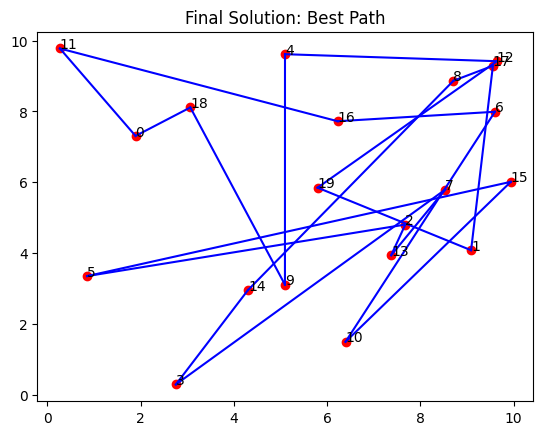

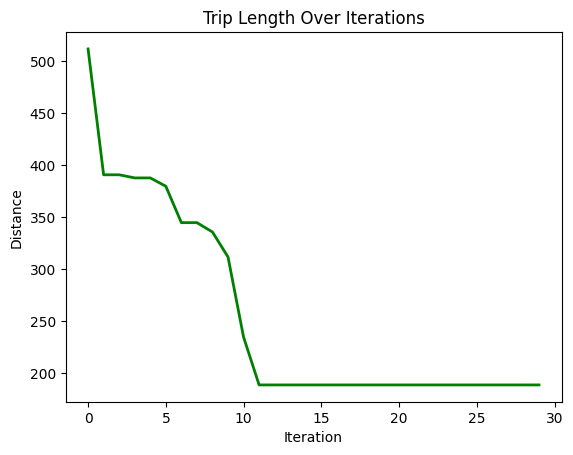

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Graph class represents the environment where ants will travel
class Graph:
    def __init__(self, distances):
        # Initialize the graph with a distance matrix (distances between nodes)
        self.distances = distances
        self.num_nodes = len(distances)  # Number of nodes (cities)
        # Initialize pheromones for each path between nodes (same size as distances)
        self.pheromones = np.ones_like(distances, dtype=float)  # Start with equal pheromones

# Ant class represents an individual ant that travels across the graph
class Ant:
    def __init__(self, graph):
        self.graph = graph
        # Choose a random starting node for the ant
        self.current_node = np.random.randint(graph.num_nodes)
        self.path = [self.current_node]  # Start path with the initial node
        self.total_distance = 0  # Start with zero distance traveled
        # Unvisited nodes are all nodes except the starting one
        self.unvisited_nodes = set(range(graph.num_nodes)) - {self.current_node}

    # Select the next node for the ant to travel to, based on pheromones and distances
    def select_next_node(self):
        # Initialize an array to store the probability for each node
        probabilities = np.zeros(self.graph.num_nodes)
        # For each unvisited node, calculate the probability based on pheromones and distances
        for node in self.unvisited_nodes:
            if self.graph.distances[self.current_node][node] > 0:  # Only consider reachable nodes
                # The more pheromones and the shorter the distance, the more likely the node will be chosen
                probabilities[node] = (self.graph.pheromones[self.current_node][node] ** 2 /
                                       self.graph.distances[self.current_node][node])
        probabilities /= probabilities.sum()  # Normalize the probabilities to sum to 1
        # Choose the next node based on the calculated probabilities
        next_node = np.random.choice(range(self.graph.num_nodes), p=probabilities)
        return next_node

    # Move to the next node and update the ant's path
    def move(self):
        next_node = self.select_next_node()  # Pick the next node
        self.path.append(next_node)  # Add it to the path
        # Add the distance between the current node and the next node to the total distance
        self.total_distance += self.graph.distances[self.current_node][next_node]
        self.current_node = next_node  # Update the current node to the next node
        self.unvisited_nodes.remove(next_node)  # Mark the next node as visited

    # Complete the path by visiting all nodes and returning to the starting node
    def complete_path(self):
        while self.unvisited_nodes:  # While there are still unvisited nodes
            self.move()  # Keep moving to the next node
        # After visiting all nodes, return to the starting node to complete the cycle
        self.total_distance += self.graph.distances[self.current_node][self.path[0]]
        self.path.append(self.path[0])  # Add the starting node to the end of the path

# ACO (Ant Colony Optimization) class runs the algorithm to find the best path
class ACO:
    def __init__(self, graph, num_ants, num_iterations, decay=0.5, alpha=1.0):
        self.graph = graph
        self.num_ants = num_ants  # Number of ants in each iteration
        self.num_iterations = num_iterations  # Number of iterations
        self.decay = decay  # Rate at which pheromones evaporate
        self.alpha = alpha  # Strength of pheromone update
        self.best_distance_history = []  # Store the best distance found in each iteration

    # Main function to run the ACO algorithm
    def run(self):
        best_path = None
        best_distance = np.inf  # Start with a very large number for comparison
        # Run the algorithm for the specified number of iterations
        for _ in range(self.num_iterations):
            ants = [Ant(self.graph) for _ in range(self.num_ants)]  # Create a group of ants
            for ant in ants:
                ant.complete_path()  # Let each ant complete its path
                # If the current ant's path is shorter than the best one found so far, update the best path
                if ant.total_distance < best_distance:
                    best_path = ant.path
                    best_distance = ant.total_distance
            self.update_pheromones(ants)  # Update pheromones based on the ants' paths
            self.best_distance_history.append(best_distance)  # Save the best distance for each iteration
        return best_path, best_distance

    # Update the pheromones on the paths after all ants have completed their trips
    def update_pheromones(self, ants):
        self.graph.pheromones *= self.decay  # Reduce pheromones on all paths (evaporation)
        # For each ant, increase pheromones on the paths they took, based on how good their path was
        for ant in ants:
            for i in range(len(ant.path) - 1):
                from_node = ant.path[i]
                to_node = ant.path[i + 1]
                # Update the pheromones inversely proportional to the total distance traveled by the ant
                self.graph.pheromones[from_node][to_node] += self.alpha / ant.total_distance

# Generate random distances between nodes (cities) for a 20-node graph
num_nodes = 20
distances = np.random.randint(1, 100, size=(num_nodes, num_nodes))  # Random distances between 1 and 100
np.fill_diagonal(distances, 0)  # Distance from a node to itself is 0
graph = Graph(distances)  # Create the graph with the random distances
aco = ACO(graph, num_ants=10, num_iterations=30)  # Initialize ACO with 10 ants and 30 iterations
best_path, best_distance = aco.run()  # Run the ACO algorithm to find the best path

# Print the best path found and the total distance
print(f"Best path: {best_path}")
print(f"Total distance: {best_distance}")

# Plotting the final solution (first plot) - Shows the final path found by the ants
def plot_final_solution(distances, path):
    num_nodes = len(distances)
    # Generate random coordinates for the nodes to visualize them on a 2D plane
    coordinates = np.random.rand(num_nodes, 2) * 10
    # Plot the nodes (cities) as red points
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='red')
    # Label each node with its index number
    for i in range(num_nodes):
        plt.text(coordinates[i, 0], coordinates[i, 1], f"{i}", fontsize=10)
    # Plot the path (edges) connecting the nodes, showing the best path found
    for i in range(len(path) - 1):
        start, end = path[i], path[i + 1]
        plt.plot([coordinates[start, 0], coordinates[end, 0]], 
                 [coordinates[start, 1], coordinates[end, 1]], 
                 'blue', linewidth=1.5)
    plt.title("Final Solution: Best Path")
    plt.show()

# Plotting the distance over iterations (second plot) - Shows how the path length improves over time
def plot_distance_over_iterations(best_distance_history):
    # Plot the best distance found in each iteration (should decrease over time)
    plt.plot(best_distance_history, color='green', linewidth=2)
    plt.title("Trip Length Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Distance")
    plt.show()

# Call the plotting functions to display the results
plot_final_solution(distances, best_path)
plot_distance_over_iterations(aco.best_distance_history)

# Particle Swarm Optimization - PSO

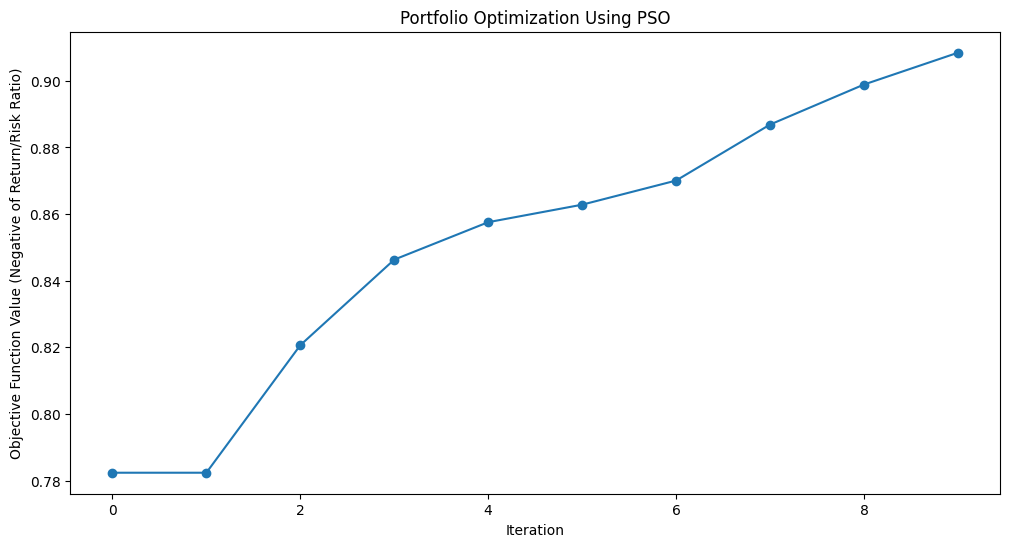

Optimal Asset Weights: [0.15857919 0.62888052 0.21254029]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PSO parameters
class Particle:
    def __init__(self, n_assets):
        # Initialize a particle with random weights and velocities
        self.position = np.random.rand(n_assets)
        self.position /= np.sum(self.position)  # Normalize weights so they sum to 1
        self.velocity = np.random.rand(n_assets)
        self.best_position = np.copy(self.position)
        self.best_score = float('inf')  # Start with a very high score

def objective_function(weights, returns, covariance):
    """
    Calculate the portfolio's performance.
    - weights: Asset weights in the portfolio.
    - returns: Expected returns of the assets.
    - covariance: Covariance matrix representing risk.
    """
    portfolio_return = np.dot(weights, returns)  # Calculate the portfolio return
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))  # Calculate portfolio risk (standard deviation)
    return -portfolio_return / portfolio_risk  # We want to maximize return and minimize risk

def update_particles(particles, global_best_position, returns, covariance, w, c1, c2):
    """
    Update the position and velocity of each particle.
    - particles: List of particle objects.
    - global_best_position: Best position found by all particles.
    - returns: Expected returns of the assets.
    - covariance: Covariance matrix representing risk.
    - w: Inertia weight to control particle's previous velocity effect.
    - c1: Cognitive coefficient to pull particles towards their own best position.
    - c2: Social coefficient to pull particles towards the global best position.
    """
    for particle in particles:
        # Random coefficients for velocity update
        r1, r2 = np.random.rand(len(particle.position)), np.random.rand(len(particle.position))
        # Update velocity
        particle.velocity = (w * particle.velocity +
                             c1 * r1 * (particle.best_position - particle.position) +
                             c2 * r2 * (global_best_position - particle.position))
        # Update position
        particle.position += particle.velocity
        particle.position = np.clip(particle.position, 0, 1)  # Ensure weights are between 0 and 1
        particle.position /= np.sum(particle.position)  # Normalize weights to sum to 1
        # Evaluate the new position
        score = objective_function(particle.position, returns, covariance)
        if score < particle.best_score:
            # Update the particle's best known position and score
            particle.best_position = np.copy(particle.position)
            particle.best_score = score

def pso_portfolio_optimization(n_particles, n_iterations, returns, covariance):
    """
    Perform Particle Swarm Optimization to find the optimal asset weights.
    - n_particles: Number of particles in the swarm.
    - n_iterations: Number of iterations for the optimization.
    - returns: Expected returns of the assets.
    - covariance: Covariance matrix representing risk.
    """
    # Initialize particles
    particles = [Particle(len(returns)) for _ in range(n_particles)]
    # Initialize global best position
    global_best_position = np.random.rand(len(returns))
    global_best_position /= np.sum(global_best_position)
    global_best_score = float('inf')
    
    # PSO parameters
    w = 0.5  # Inertia weight: how much particles are influenced by their own direction
    c1 = 1.5  # Cognitive coefficient: how well particles learn from their own best solutions
    c2 = 0.5  # Social coefficient: how well particles learn from global best solutions
    history = []  # To store the best score at each iteration
    
    for _ in range(n_iterations):
        update_particles(particles, global_best_position, returns, covariance, w, c1, c2)
        for particle in particles:
            score = objective_function(particle.position, returns, covariance)
            if score < global_best_score:
                # Update the global best position and score
                global_best_position = np.copy(particle.position)
                global_best_score = score
        # Store the best score (negative return/risk ratio) for plotting
        history.append(-global_best_score)
    
    return global_best_position, history

# Example data for 3 assets
returns = np.array([0.02, 0.28, 0.15])  # Expected returns for each asset
covariance = np.array([[0.1, 0.02, 0.03],  # Covariance matrix for asset risks
                       [0.02, 0.08, 0.04],
                       [0.03, 0.04, 0.07]])

# Run the PSO algorithm
n_particles = 10  # Number of particles
n_iterations = 10  # Number of iterations
best_weights, optimization_history = pso_portfolio_optimization(n_particles, n_iterations, returns, covariance)

# Plotting the optimization process
plt.figure(figsize=(12, 6))
plt.plot(optimization_history, marker='o')
plt.title('Portfolio Optimization Using PSO')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Negative of Return/Risk Ratio)')
plt.grid(False)  # Turn off gridlines
plt.show()

# Display the optimal asset weights
print(f"Optimal Asset Weights: {best_weights}")

# Artificial Bee Colony - ABC

Best Solution (x, y): [-1.91924008 -1.01796395]
Best Fitness (Minimum Value): 0.2741576174751934


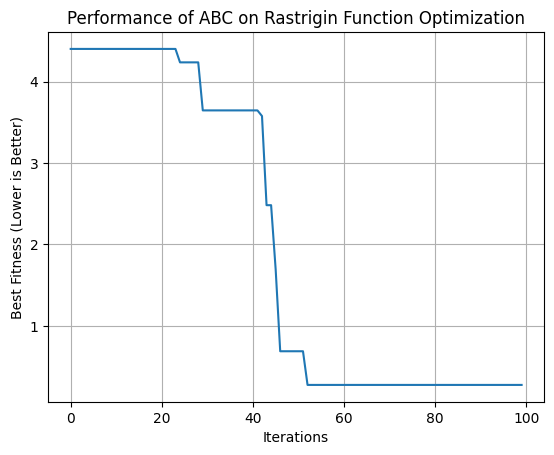

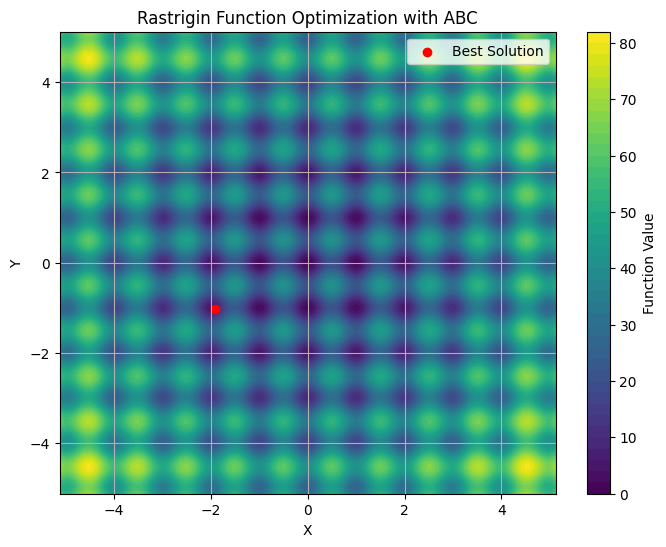

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Rastrigin function: The objective is to minimize this function
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x ** 2 - A * np.cos(2 * np.pi * x)) for x in X])

# Artificial Bee Colony (ABC) algorithm for continuous optimization of Rastrigin function
def artificial_bee_colony_rastrigin(n_iter=100, n_bees=30, dim=2, bound=(-5.12, 5.12)):
    """
    Apply Artificial Bee Colony (ABC) algorithm to minimize the Rastrigin function.
    
    Parameters:
    n_iter (int): Number of iterations
    n_bees (int): Number of bees in the population
    dim (int): Number of dimensions (variables)
    bound (tuple): Bounds for the search space (min, max)
    
    Returns:
    tuple: Best solution found, best fitness value, and list of best fitness values per iteration
    """
    # Initialize the bee population with random solutions within the given bounds
    bees = np.random.uniform(bound[0], bound[1], (n_bees, dim))
    best_bee = bees[0]
    best_fitness = rastrigin(best_bee)
    
    best_fitnesses = []
    
    for iteration in range(n_iter):
        # Employed bees phase: Explore new solutions based on the current bees
        for i in range(n_bees):
            # Generate a new candidate solution by perturbing the current bee's position
            new_bee = bees[i] + np.random.uniform(-1, 1, dim)
            new_bee = np.clip(new_bee, bound[0], bound[1])  # Keep within bounds
            
            # Evaluate the fitness of the new solution
            new_fitness = rastrigin(new_bee)
            if new_fitness < rastrigin(bees[i]):
                bees[i] = new_bee  # Update bee if the new solution is better
        
        # Onlooker bees phase: Exploit good solutions
        fitnesses = np.array([rastrigin(bee) for bee in bees])
        probabilities = 1 / (1 + fitnesses)  # Higher fitness gets higher chance
        probabilities /= probabilities.sum()  # Normalize probabilities
        
        for i in range(n_bees):
            if np.random.rand() < probabilities[i]:
                selected_bee = bees[i]
                # Generate a new candidate solution by perturbing the selected bee
                new_bee = selected_bee + np.random.uniform(-0.5, 0.5, dim)
                new_bee = np.clip(new_bee, bound[0], bound[1])
                if rastrigin(new_bee) < rastrigin(selected_bee):
                    bees[i] = new_bee
        
        # Scouting phase: Randomly reinitialize some bees to explore new areas
        if np.random.rand() < 0.1:  # 10% chance to reinitialize a bee
            scout_index = np.random.randint(n_bees)
            bees[scout_index] = np.random.uniform(bound[0], bound[1], dim)
        
        # Track the best solution found so far
        current_best_bee = bees[np.argmin(fitnesses)]
        current_best_fitness = min(fitnesses)
        
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_bee = current_best_bee
        
        best_fitnesses.append(best_fitness)
    
    return best_bee, best_fitness, best_fitnesses

# Apply ABC to minimize the Rastrigin function
best_solution, best_fitness, best_fitnesses = artificial_bee_colony_rastrigin()

# Display results
print("Best Solution (x, y):", best_solution)
print("Best Fitness (Minimum Value):", best_fitness)

# Plot the performance over iterations
plt.figure()
plt.plot(best_fitnesses)
plt.title('Performance of ABC on Rastrigin Function Optimization')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness (Lower is Better)')
plt.grid(True)
plt.show()

# Plot a surface graph of the Rastrigin function
x = np.linspace(-5.12, 5.12, 200)
y = np.linspace(-5.12, 5.12, 200)
X, Y = np.meshgrid(x, y)
Z = 10 * 2 + (X ** 2 - 10 * np.cos(2 * np.pi * X)) + (Y ** 2 - 10 * np.cos(2 * np.pi * Y))

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function Value')
plt.scatter(best_solution[0], best_solution[1], c='red', label='Best Solution')
plt.title('Rastrigin Function Optimization with ABC')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()